In [37]:
#---Import relevant modules; set up inline---

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
#---Read in data---
#This must be in the same folder and named appropriately.

master_df=pd.read_csv("master.csv")
batting_df=pd.read_csv("batting.csv")


In [4]:
#---Remove rows where hits=0---

#USED: http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

batting_df_=batting_df[batting_df.H != 0].copy()

In [5]:
#---Make our dependent variable---
#Dependent variable is the ratio of homeruns to hits; hereafter, 'ratio'.

hits=batting_df_["H"]
homeruns=batting_df_["HR"]

#USED: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.divide.html

ratios=homeruns.divide(hits)

batting_df_["ratio"]=ratios

In [6]:
#---Characterise our dependent variable (1D) (First attempt)---

#Mean

print ratios.mean()

#Range

print ratios.min()
print ratios.max()

#Histogram
print len(ratios)

print len(ratios.dropna())
#for q in [40000, 42500, 45000, 47500, 50000]:
#    print q
#    ratios_thin=ratios[:q]
#    #print ratios_thin
#    plt.hist(ratios_thin, bins=100)
#    plt.show()

0.054594842055
0.0
1.0
80459
75310


In [7]:
#---Wrangling---

#--Locating flawed data--
if False:
    for q in [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]:
        print q
        ratios_thin=ratios[:q]
        #print ratios_thin
        plt.hist(ratios_thin, bins=100)
        plt.show()
    
if False:
    for q in [40000, 42500, 45000, 47500, 50000]:
        print q
        ratios_thin=ratios[:q]
        #print ratios_thin
        plt.hist(ratios_thin, bins=100)
        plt.show()
        
if False:
    for q in [80000, 70000, 60000, 50000, 40000, 30000, 20000, 10000]:
        print q
        ratios_thin=ratios[q:]
        #print ratios_thin
        plt.hist(ratios_thin, bins=100)
        plt.show()

In [8]:
print batting_df_[60950:61000]

        playerID  yearID  stint teamID lgID    G     AB      R      H    2B  \
71258   lakest01    1993      1    CHN   NL   44  120.0   11.0   27.0   6.0   
71259  lampkto01    1993      1    ML4   AL   73  162.0   22.0   32.0   8.0   
71262  landrce01    1993      1    NYN   NL   22   19.0    2.0    5.0   1.0   
71263  langsma01    1993      1    CAL   AL   35    NaN    NaN    NaN   NaN   
71264  lankfra01    1993      1    SLN   NL  127  407.0   64.0   97.0  17.0   
71265  lansimi01    1993      1    MON   NL  141  491.0   64.0  141.0  29.0   
71266  larkiba01    1993      1    CIN   NL  100  384.0   57.0  121.0  20.0   
71267  larkige01    1993      1    MIN   AL   56  144.0   17.0   38.0   7.0   
71268  lavalmi01    1993      1    PIT   NL    1    5.0    0.0    1.0   0.0   
71269  lavalmi01    1993      2    CHA   AL   37   97.0    6.0   25.0   2.0   
71271  leachte01    1993      1    CHA   AL   14    NaN    NaN    NaN   NaN   
71273    leede01    1993      1    MIN   AL   15   3

In [9]:
#--Analysis--

#After looking at the data more closely in Excel . . .

#Rows are randomly missing from 1973-1999.
#NOT removed completely at random, could therefore have biased the sample: missing for AL only, there may be other risk factors.
#NOT just a case of zeros being treated as blanks: checked http://www.baseball-reference.com/players/g/geiseda01.shtml against equivalent data.

#--Response--

#Response: use two datasets, one for 1871-1972 and one from 2000-2015.
#Former will be best for determining long-term trends; latter most relevant to modern era.

batting_df_pre_20th_c=batting_df_[batting_df_.yearID < 1973].copy()
batting_df_20th_c=batting_df_[batting_df_.yearID > 1999].copy()


Analysis of ratio
------------
MEAN: 0.0365106380292
RANGE: 0.0 to 1.0


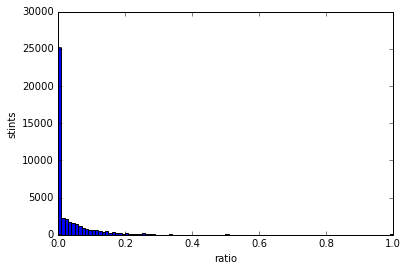

Analysis of ratio
------------
MEAN: 0.0876429658259
RANGE: 0.0 to 1.0


Analysis of H
------------
MEAN: 48.037867257
RANGE: 1.0 to 257.0


Analysis of H
------------
MEAN: 52.4434972842
RANGE: 1.0 to 262.0


Analysis of HR
------------
MEAN: 2.50592684839
RANGE: 0.0 to 61.0


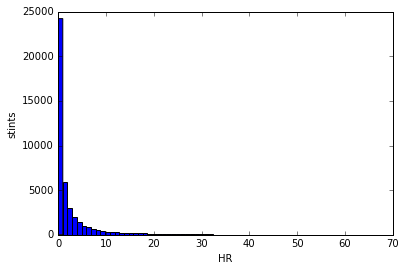

Analysis of HR
------------
MEAN: 6.03522933011
RANGE: 0.0 to 73.0


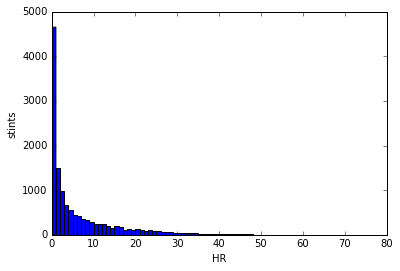

In [49]:
#---Characterise our dependent variable (1D)---

def basic_analysis(df, column, bin_n=100):
    print ("Analysis of " + column)
    print "------------"
    target=df[column]
    #If there are any NaN (the result of blank cells as well as calculations going wrong), the if-statement below calls
    #attention to this and ends the analysis prematurely.
    if len(target) != len(target.dropna()):
        print "Error: there are still missing records in target column!"
        return None
    print("MEAN: " + str(target.mean()))
    print("RANGE: " + str(target.min()) + " to " + str(target.max()))
    plt.hist(target, bins=bin_n)
    plt.xlabel(column)
    plt.ylabel("stints")
    plt.show()
    return None

basic_analysis(batting_df_pre_20th_c, "ratio")

basic_analysis(batting_df_20th_c, "ratio")

#---Characterise components---
#(we want to characterise hits as an independent variable, we also want to see how much of the change in ratio is down to which component)

basic_analysis(batting_df_pre_20th_c, "H", 257)

basic_analysis(batting_df_20th_c, "H", 262)

basic_analysis(batting_df_pre_20th_c, "HR",62)

basic_analysis(batting_df_20th_c, "HR",73)

In [11]:
#---Characterise non-numerical independent variables---

#--Make sure unknowns are marked as such, instead of left blank--

def mark_unknown(thing):
    if thing in acceptable_list:
        return thing
    else:
        return "U"

acceptable_list=["L", "R", "B"]
master_df["bats"]=master_df["bats"].apply(mark_unknown)

#--Characterise left/right/both/unknown handedness--

#-Sum the number of left/right/etc handed players-

grouped_data_bats = master_df.groupby('bats')
stat = grouped_data_bats.count()["playerID"]
print stat
#USED: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
stat.plot(kind="bar")

plt.ylabel("players")


bats
B     1163
L     4877
R    11615
U     1191
Name: playerID, dtype: int64


In [50]:
#--Collect same/cross/other handedness--

def compare_throw_and_bat(throws, bats):
    if (throws=="R" and bats=="R") or (throws=="L" and bats=="L"):
        return "S"
    if (throws=="R" and bats=="L") or (throws=="L" and bats=="R"):
        return "C"
    return "O"

#USED: http://stackoverflow.com/questions/16353729/pandas-how-to-use-apply-function-to-multiple-columns

master_df['samehandedness'] = master_df.apply(lambda row: compare_throw_and_bat(row["throws"], row["bats"]), axis=1)

master_df.head()

#--Characterise same/cross/other handedness--

grouped_data_samehandedness = master_df.groupby('samehandedness')
stat_II = grouped_data_samehandedness.count()["playerID"]
print stat_II
#USED: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
stat_II.plot(kind="bar")
plt.ylabel("players")

samehandedness
C     2613
O     2466
S    13767
Name: playerID, dtype: int64


In [13]:
#---Define correlator---

def correlation(x, y):

    x_st=(x-x.mean())/x.std(ddof=0)
    y_st=(y-y.mean())/y.std(ddof=0)
    
    comb=x_st*y_st
    
    return comb.mean()



In [14]:
#---Merge dataframes appropriately---

#I confirmed using the Readme that the PlayerIDs in these two csv files always correspond to each other; that retroID and bbrefID
#exist for use with other data sources only.

merged_df_20th_c=master_df.merge(batting_df_20th_c, on=["playerID","playerID"], how="right")
merged_df_pre_20th_c=master_df.merge(batting_df_pre_20th_c, on=["playerID", "playerID"], how="right")

master_df.head()

playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay      ...             nameGiven  \
0      Denver        NaN         NaN       NaN      ...           David Allan   
1      Mobile        NaN         NaN       NaN      ...           Henry Louis   
2      Mobile     1984.0         8.0      16.0      ...            Tommie Lee   
3      Orange        NaN         NaN       NaN      ...        Donald William   
4  Palm Beach        NaN         NaN       NaN      ...         Fausto Andres   

  weight height bats throws       debut   finalGame   retroID    bbrefID  \
0  220.0   75.0    R      R  2004-04-06  2015-08-23  aardd001  aardsda01   
1  180.0   72.0    R      R  1954-04-13  1976-10-03  aaroh101  aaronha01   
2  190.0   75.0    R      R  1962-04-10  1971-09-26  aarot101  aaronto01   
3  190.0   75.0    R      R  1977-07-26  1990-10-03  aased001   aasedo01   
4  184.0   73.0    L      L  2001-09-10  2006-04-13  abada001   abadan01   

  samehandedness  
0              S  
1              S  
2              S  
3              S  
4              S  

[5 rows x 25 columns]

In [15]:

#---Relate numerical independent variables with dependent variable---

#--Calculate correlations--

#-Relate number of hits to ratio-
print correlation(batting_df_pre_20th_c["H"], batting_df_pre_20th_c["ratio"])
print correlation(batting_df_20th_c["H"], batting_df_20th_c["ratio"])
#-Relate time to ratio-
print correlation(batting_df_pre_20th_c["yearID"], batting_df_pre_20th_c["ratio"])
print correlation(batting_df_20th_c["yearID"], batting_df_20th_c["ratio"])


0.181058347372
0.235172455201
0.264969645788
-0.0187469089233


In [30]:
#--Plot graphs--

#-Ratio vs hits

plt.scatter(batting_df_20th_c["H"], batting_df_20th_c["ratio"], s=1)
axes = plt.gca()
axes.set_xlim([0, 300])
axes.set_ylim([0, 1])

plt.ylabel("ratio")
plt.xlabel("hits per stint")

In [32]:

batting_df_2015_only=batting_df_20th_c[batting_df_20th_c.yearID >2014].copy()

#USED: http://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib

from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([batting_df_2015_only["H"], batting_df_2015_only["ratio"]])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(batting_df_2015_only["H"], batting_df_2015_only["ratio"], c=z, s=9, edgecolor='')
ax.set_xlim([0, 300])
ax.set_ylim([0, 1])

plt.ylabel("ratio")
plt.xlabel("hits per stint")

plt.show()



In [33]:
#-Ratio vs Time-

#batting_df_20th_c["bats"].head()
grouped_data = merged_df_20th_c.groupby('yearID')
x= grouped_data["ratio"].mean()
plot(x)

grouped_data = merged_df_pre_20th_c.groupby('yearID')
y= grouped_data["ratio"].mean()
plot(y)

plt.xlabel("year")
plt.ylabel("ratio of average stint")

(0.06, 0.14)

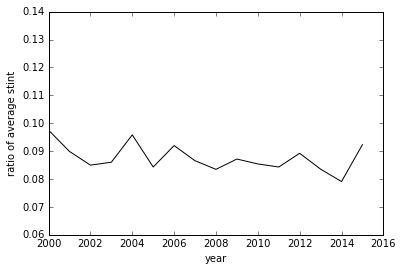

In [52]:
#---Relate non-numerical independent variables with dependent variable---

grouped_data = merged_df_20th_c.groupby('yearID')
a= grouped_data["ratio"].mean()
plot(a, color="black")

plt.xlabel("year")
plt.ylabel("ratio of average stint")

plt.ylim(0.06, 0.14)

(0.06, 0.14)

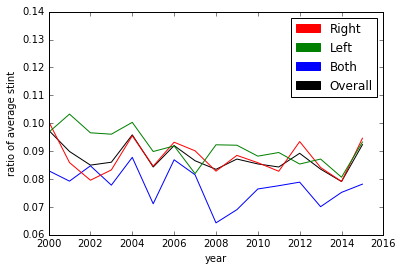

In [47]:
#USED: http://matplotlib.org/users/legend_guide.html

grouped_data_II = merged_df_20th_c.groupby(["bats",'yearID'])
b=grouped_data_II["ratio"].mean()
plot(a, color="black")
plot(b["B"], color="blue")
plot(b["R"], color="red")
plot(b["L"], color="green")

plt.xlabel("year")
plt.ylabel("ratio of average stint")


green_patch = mpatches.Patch(color='green', label='Left')
red_patch = mpatches.Patch(color='red', label='Right')
blue_patch = mpatches.Patch(color='blue', label='Both')
black_patch = mpatches.Patch(color='black', label='Overall')

plt.legend(handles=[red_patch, green_patch, blue_patch, black_patch])

plt.ylim(0.06, 0.14)

(0.06, 0.14)

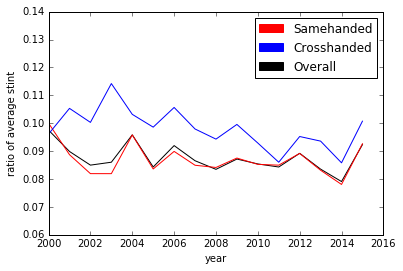

In [48]:
grouped_data_III = merged_df_20th_c.groupby(["samehandedness",'yearID'])
c= grouped_data_III["ratio"].mean()
#print c
plot(a, color="black")
plot(c["S"], color="red")
plot(c["C"], color="blue")

plt.xlabel("year")
plt.ylabel("ratio of average stint")

red_patch = mpatches.Patch(color='red', label='Samehanded')
blue_patch = mpatches.Patch(color='blue', label='Crosshanded')
black_patch = mpatches.Patch(color='black', label='Overall')

plt.legend(handles=[red_patch, blue_patch, black_patch])

plt.ylim(0.06, 0.14)

In [53]:
#---Statistical test of main result---

#The raw data cannot be approximated Gaussian.
#However, the yearly-average data could.
#A one-tailed t-test is in order.

CROSS=np.array(c["C"])
SAME=np.array(c["S"])

DIFF=CROSS-SAME

#n=16, df=15
#using https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg, tcrit=1.761

SEM=DIFF.std(ddof=1)/sqrt(16)
t=DIFF.mean()/SEM

print "t"
print t

t
5.52183343275
